# save the bees dataset 
Using the dataset, I've plotted the data points along with calculated trendlines in order to estimate the possible number of bee colony numbers in the USA in future years.

In [1]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure 
from bokeh.io import output_file, show
from bokeh.models import HoverTool, ColumnDataSource

In [2]:
df=pd.read_csv("bee_colony_survey_data_by_state.csv")

In [3]:
df

,year,period,week_ending,state,state_ansi,watershed,data_item,value,cv
0,2017,JAN THRU MAR,NaN,ALABAMA,1,NaN,ADDED & REPLACED,570,NaN
1,2017,JAN THRU MAR,NaN,ARIZONA,4,NaN,ADDED & REPLACED,2900,NaN
2,2017,JAN THRU MAR,NaN,ARKANSAS,5,NaN,ADDED & REPLACED,430,NaN
3,2017,JAN THRU MAR,NaN,CALIFORNIA,6,NaN,ADDED & REPLACED,215000,NaN
4,2017,JAN THRU MAR,NaN,COLORADO,8,NaN,ADDED & REPLACED,100,NaN
...,...,...,...,...,...,...,...,...,...
3391,1987,MARKETING YEAR,NaN,VIRGINIA,51,NaN,INVENTORY,25000,NaN
3392,1987,MARKETING YEAR,NaN,WASHINGTON,53,NaN,INVENTORY,75000,NaN
3393,1987,MARKETING YEAR,NaN,WEST VIRGINIA,54,NaN,INVENTORY,21000,NaN
3394,1987,MARKETING YEAR,NaN,WISCONSIN,55,NaN,INVENTORY,92000,NaN


The data shows different periods of time, some full year and some quarterly, and different data items. I'm just interested in taking the full inventory for each year, totalled for the whole USA:

In [4]:
marketing_year=df[df['period']=='MARKETING YEAR']
year_and_total = marketing_year.groupby('year').value.sum()

The bokeh plot below opens a new HTML file that shows an interactive scatter plot with a linear trend line

In [5]:
output_file("scatter.html")
f=figure(plot_width=800)

x=year_and_total.index
y=year_and_total.values/1000000

cds = ColumnDataSource(data=dict(
    x=x,
    y=y,
    total=year_and_total.values,
    year=year_and_total.index
))

c1=f.circle(x='x',y='y',size=8,source=cds)
l1=f.line(x='x',y='y',source=cds) 

f.title.text="Bee Colonies in the USA from 1987-2017" 
f.xaxis.axis_label="Year"
f.yaxis.axis_label="Bee Colonies (Millions)"
f.xaxis.ticker = [y for y in year_and_total.index if y%2==1]

hover = HoverTool(renderers=[c1,l1],tooltips=[("Year","@year"),("Total", "@total")])
f.add_tools(hover)

par = np.polyfit(x, y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
y_predicted = [slope*i + intercept  for i in x]
f.line(x,y_predicted,color='red',legend='y='+str(round(slope,4))+'x+'+str(round(intercept,2)))

show(f)

In [6]:
print(slope)
print(intercept)

-0.023609274193548132
49.982186290322055


Using the generated slope and intercept to calculate future values:

In [7]:
future_value = {}
for i in range(2018, 2051):
    future_value[i] = slope * i + intercept

Using matplotlib, I've created another plot to show the declining trend in future years: 

In [8]:
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

plt.plot(list(future_value.keys()), list(future_value.values()), 'o',)
plt.show()
print("Bee Colony Numbers (Millions) in 2050: ", round(future_value[2050], 3))

<Figure size 640x480 with 1 Axes>

Bee Colony Numbers (Millions) in 2050:  1.583


Note: The algebraic models created don’t take into account the uptick in bee colony numbers seen in the year 2009 and onwards. Many of the initiatives proposed have been implemented by local governments and beekeepers in the USA, so the trend may continue upwards. Conversely, without the initiatives, the bee colony numbers may decrease by a level higher than what the function suggests. This is purely for education and speculative purposes only!

# Other trendlines:
I've created another plot showing a third degree polynomial fit on the data

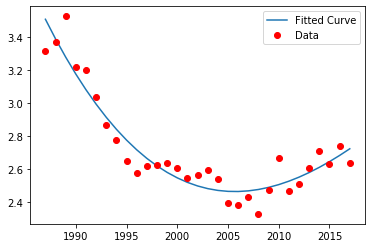

In [9]:
def func(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d

popt, pcov = curve_fit(func, x, y)
plt.plot(x, func(x, *popt), label="Fitted Curve") 
plt.plot(x, y, 'ro', label="Data")
plt.legend(loc='upper right')
plt.show()

/Users/anita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


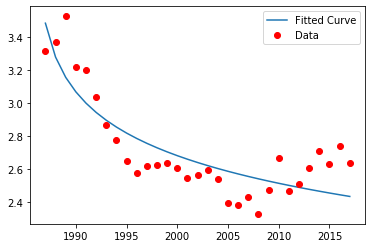

In [10]:
def func(x, b, a=0.6, c=3.316):
    return -a * (np.log(x - b)) + c

popt, pcov = curve_fit(func, x, y)
plt.plot(x, func(x, *popt), label="Fitted Curve") 
plt.plot(x, y, 'ro', label="Data")
plt.legend(loc='upper right')
plt.show()